# Naive Bayes Classifier
## Hyperparameter tuning with grid search and cross-validation

<br>
**Bayes's Rule**

![](../images/Bayes_rule.png)

** Naive Bayes** 

<img src="../images/NB.jpg" width="500">

Naive Bayes methods are a set of supervised learning algorithms based on applying **Bayes’ theorem** with the “naive” assumption of independence between every pair of features. 
<br>
<br>
**Classification rule:**
Given a class variable y and a dependent feature vector $x_1$ through $x_n$, Bayes’ theorem states the following relationship:
$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}
                                 {P(x_1, \dots, x_n)}$$
Using the naive independence assumption that
$$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y),$$
for all i, this relationship is simplified to
$$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}
                                 {P(x_1, \dots, x_n)}$$
Since $P(x_1, \dots, x_n)$ is constant given the input, we can use the following classification rule:
$$P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)$$

$$\Downarrow$$

$$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),$$

and we can use **Maximum A Posteriori (MAP)** estimation to estimate $P(y)$ and $P(x_i \mid y)$; the former is then the relative frequency of class y in the training set.
<br>
<br>
The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of $P(x_i \mid y)$.
<br>
<br>
In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. They require a small amount of training data to estimate the necessary parameters.
<br>
<br>
Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods. The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This in turn helps to alleviate problems stemming from the curse of dimensionality.
<br>
<br>
On the flip side, although naive Bayes is known as a decent classifier, it is known to be a bad estimator, so the probability outputs should not be taken too seriously.
<br>
## Import Python Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload

## Import Utility Classes

In [2]:
%autoreload 2
import sys
sys.path.append('..')

from utils.data_loader import DataLoader
from utils.term_counter_helper import TermFrequency, TfIdf
from utils.data_frame_helper import DataFrameHelper
from utils.model_evaluation_helper import ModelEvaluationHelper
from utils.classifier_helper import Classifier

## Load Data

In [3]:
loader = DataLoader()
content = loader.load_data("../Data/trainingdata.txt")

Number of Sentences:  5485



In [4]:
label_names = np.array(["A", "B", "C", "D", "E", "F", "G", "H"])
df = loader.get_data_frame(content, label_names)
df_helper = DataFrameHelper(df, label_names)

## Input Dataset in DataFrame Format

In [5]:
df_helper.df.head()

,Labels,Text
0,A,champion products ch approves stock split cham...
1,B,computer terminal systems cpml completes sale ...
2,A,cobanco inc cbco year net shr cts vs dlrs net ...
3,A,am international inc am nd qtr jan oper shr lo...
4,A,brown forman inc bfd th qtr net shr one dlr vs...


## Vectorize Text Into Word Counts for Naive Bayes Classifiers

In [6]:
min_df = 2

tf = TermFrequency(
    label_names,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    stop_words='english',
    ngram_range=(1, 1),
    analyzer='word',
    max_df=0.8,
    min_df = min_df,
    max_features=None,
    vocabulary=None)

tf.vectorize_corpus(df_helper.raw_text)
tf.vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.8, max_features=None, min_df=2,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

## Split Dataset into Trainset and Testset

In [7]:
tf_model_evaluation = ModelEvaluationHelper(
    tf.X, df_helper.y, test_size=0.3, random_state=3, label_names = df_helper.label_names)

## Multinomial Naive Bayes

**MultinomialNB** implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification (where the data are typically represented as word vector counts, although tf-idf vectors are also known to work well in practice).
<br>
<br>
The distribution is parametrized by vectors $\theta_y = (\theta_{y1},\ldots,\theta_{yn})$ for each class $y$, where $n$ is the number of features (in text classification, the size of the vocabulary) and $\theta_{yi}$ is the probability $P(x_i \mid y)$ of feature $i$ appearing in a sample belonging to class $y$.
The parameters $\theta_y$ is estimated by a smoothed version of maximum likelihood, i.e. relative frequency counting:
$$\hat{\theta}_{yi} = \frac{ N_{yi} + \alpha}{N_y + \alpha n}$$
where $N_{yi} = \sum_{x \in T} x_i$ is the number of times feature $i$ appears in a sample of class $y$ in the training set $T$, and $N_{y} = \sum_{i=1}^{|T|} N_{yi}$ is the total count of all features for class $y$.
<br>
<br>
The smoothing priors $\alpha \ge$ 0 accounts for features not present in the learning samples and prevents zero probabilities in further computations. Setting $\alpha = 1$ is called Laplace smoothing, while $\alpha < 1$ is called Lidstone smoothing.

## Initialize Multinomia Naive Bayes Classifier

In [8]:
clf = Classifier()
multinomialNB = clf.multinomial_NB_clf("multinomialNB")

## Set Smoothing Prior Range

In [9]:
hyperparameters = {
    'alpha': (1.0, .1, .01, .001),
}
tf_model_evaluation.set_hyperparam_grid(hyperparameters)

## Run Grid Search with Cross Validation

In [10]:
tf_model_evaluation.cross_val_grid_search(multinomialNB, "accuracy", cv = 5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best score: 0.945
Best parameters set:
	alpha: 1.0

Grid scores on training set:

0.945 (+/-0.019) for {'alpha': 1.0}
0.943 (+/-0.018) for {'alpha': 0.1}
0.939 (+/-0.023) for {'alpha': 0.01}
0.931 (+/-0.025) for {'alpha': 0.001}

Detailed classification report:

The model is trained on the full train set with cross-validation.
The scores are computed on the full test set.

             precision    recall  f1-score   support

          A       0.99      0.96      0.97       826
          B       0.93      0.97      0.95       511
          C       0.75      0.89      0.81        63
          D       1.00      0.79      0.88        42
          E       0.60      0.30      0.40        10
          F       0.95      0.96      0.96        83
          G       0.85      0.79      0.82        57
          H       0.70      0.78      0.74        54

avg / total       0.94      0.94      0.94      1646




[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished


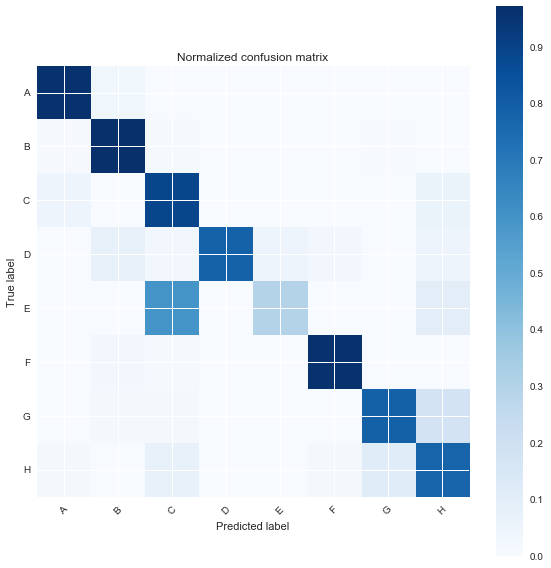

In [11]:
tf_model_evaluation.confusion_matrix()

## Bernoulli Naive Bayes

**BernoulliNB** implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable. Therefore, this class requires samples to be represented as binary-valued feature vectors; if handed any other kind of data, a BernoulliNB instance may binarize its input (depending on the binarize parameter).
<br>
<br>
The decision rule for Bernoulli naive Bayes is based on
$$P(x_i \mid y) = P(i \mid y) x_i + (1 - P(i \mid y)) (1 - x_i)$$
which differs from multinomial NB’s rule in that it explicitly penalizes the non-occurrence of a feature $i$ that is an indicator for class $y$, where the multinomial variant would simply ignore a non-occurring feature.
<br>
<br>
In the case of text classification, **word occurrence vectors** (rather than word count vectors) may be used to train and use this classifier. BernoulliNB might perform better on some datasets, especially those with shorter documents. It is advisable to evaluate both models, if time permits.

## Multinomia Naive Bayes Classifier: Run Grid Search with Cross Validation

In [12]:
bernoulliNB = clf.multinomial_NB_clf("bernoulliNB")
tf_model_evaluation.cross_val_grid_search(bernoulliNB, "accuracy", cv = 5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best score: 0.892
Best parameters set:
	alpha: 0.001

Grid scores on training set:

0.799 (+/-0.023) for {'alpha': 1.0}
0.878 (+/-0.017) for {'alpha': 0.1}
0.891 (+/-0.021) for {'alpha': 0.01}
0.892 (+/-0.026) for {'alpha': 0.001}

Detailed classification report:

The model is trained on the full train set with cross-validation.
The scores are computed on the full test set.

             precision    recall  f1-score   support

          A       0.94      0.95      0.95       826
          B       0.89      0.92      0.91       511
          C       0.62      0.71      0.67        63
          D       0.97      0.71      0.82        42
          E       1.00      0.30      0.46        10
          F       0.92      0.88      0.90        83
          G       0.74      0.70      0.72        57
          H       0.64      0.59      0.62        54

avg / total       0.90      0.90      0.90      1646




[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s finished


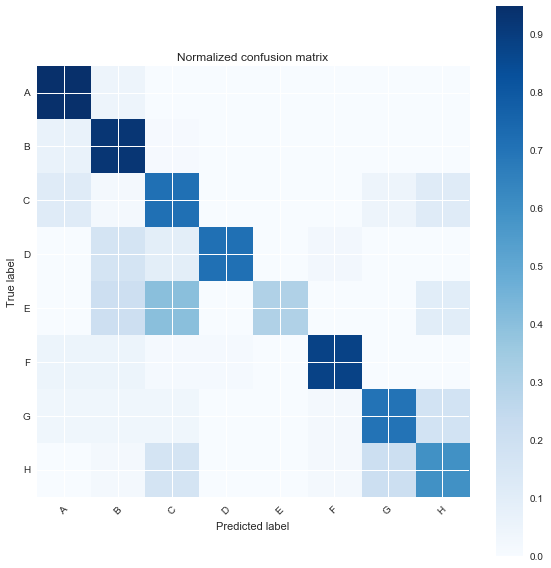

In [13]:
tf_model_evaluation.confusion_matrix()